In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_solv_cand_at_rt = pd.read_csv('all_candidates_param_at_rt.csv')
all_solv_cand_at_rt

,solvent,D,P,H,epsilon,pi_star,HBD,HBA,logP_solv
0,DMAC,16.8,11.5,10.2,37.78,0.88,0.00,0.76,-0.77
1,Acetone,15.5,10.4,7.0,20.70,0.60,0.10,0.50,-0.21
2,DMSO,18.4,16.4,10.2,46.45,1.00,0.00,0.76,-1.38
3,DMF,17.4,13.7,11.3,36.70,0.88,0.00,0.69,-1.31
4,ACN,15.3,18.0,6.1,37.50,0.75,0.19,0.40,-0.39
5,NPA,16.0,6.8,17.4,20.45,0.52,0.84,0.90,0.36
6,tBuOH,15.2,5.1,14.7,12.00,0.41,0.42,0.93,0.58
7,EA,15.8,5.3,7.2,6.02,0.55,0.00,0.45,0.71
8,Dioxane,19.0,1.8,7.4,2.25,0.55,0.00,0.37,-0.27
9,THF,16.8,5.7,8.0,7.58,0.58,0.00,0.55,0.53


In [3]:
def temp_corr(rt_df, to_temp):
    
    rt_D = rt_df['D']
    rt_P = rt_df['P']
    rt_H = rt_df['H']
    
    temp_corr_df = rt_df.copy()
    temp_corr_df = temp_corr_df.drop(['D', 'P', 'H'], axis = 1)
    
    temp_corr_df['D_25'] = rt_D
    temp_corr_df['P_25'] = rt_P
    temp_corr_df['H_25'] = rt_H
    
    temp_diff = to_temp - 25
    
    new_D = rt_D * (1-1.25*0.0007*temp_diff)
    new_P = rt_P * (1-0.5*0.0007*temp_diff)
    new_H = rt_H * (1-(0.00122+0.5*0.0007)*temp_diff)
    
    HSP_temp_suf = str(to_temp)
    col_new_D = '_'.join(['D', HSP_temp_suf])
    col_new_P = '_'.join(['P', HSP_temp_suf])
    col_new_H = '_'.join(['H', HSP_temp_suf])
    
    temp_corr_df[col_new_D] = new_D
    temp_corr_df[col_new_P] = new_P
    temp_corr_df[col_new_H] = new_H
    
    temp_corr_df['solvent'] = temp_corr_df['solvent'].str.lower()
    
    
    return temp_corr_df
    

In [4]:
temp_corr_df = temp_corr(all_solv_cand_at_rt, 50)

In [5]:
temp_corr_df

,solvent,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50
0,dmac,37.78,0.88,0.00,0.76,-0.77,16.8,11.5,10.2,16.432500,11.399375,9.799650
1,acetone,20.70,0.60,0.10,0.50,-0.21,15.5,10.4,7.0,15.160938,10.309000,6.725250
2,dmso,46.45,1.00,0.00,0.76,-1.38,18.4,16.4,10.2,17.997500,16.256500,9.799650
3,dmf,36.70,0.88,0.00,0.69,-1.31,17.4,13.7,11.3,17.019375,13.580125,10.856475
4,acn,37.50,0.75,0.19,0.40,-0.39,15.3,18.0,6.1,14.965313,17.842500,5.860575
5,npa,20.45,0.52,0.84,0.90,0.36,16.0,6.8,17.4,15.650000,6.740500,16.717050
6,tbuoh,12.00,0.41,0.42,0.93,0.58,15.2,5.1,14.7,14.867500,5.055375,14.123025
7,ea,6.02,0.55,0.00,0.45,0.71,15.8,5.3,7.2,15.454375,5.253625,6.917400
8,dioxane,2.25,0.55,0.00,0.37,-0.27,19.0,1.8,7.4,18.584375,1.784250,7.109550
9,thf,7.58,0.58,0.00,0.55,0.53,16.8,5.7,8.0,16.432500,5.650125,7.686000


In [6]:
test_result_name = 'mono_hsp_yield_with_mixture_all_incl_0_reformat_before_2397.csv'
test_result_df = pd.read_csv(test_result_name)

In [7]:
test_result_df

,rxn_id_0.5g_3d_50C,solv_1,percent_1,solv_2,percent_2,valid_yield
0,Xf2346,DMAC,1.0,NaN,NaN,0.82
1,Xf2353,Acetone,1.0,NaN,NaN,0.72
2,Xf2345,DMSO,1.0,NaN,NaN,0.70
3,Xf2344,DMF,1.0,NaN,NaN,0.62
4,Xf2352,ACN,1.0,NaN,NaN,0.52
5,Xf2350,NPA,1.0,NaN,NaN,0.26
6,Xf2351,tBuOH,1.0,NaN,NaN,0.14
7,Xf2356,EA,1.0,NaN,NaN,0.01
8,xf2379,EA,0.2,acetone,0.8,0.35
9,xf2380,EA,0.4,acetone,0.6,0.59


In [8]:
#redo the mixture calculation.. The updated pandas is not doing the same thing...

In [9]:
def calc_mix_parameter(mix_result_df, single_parameter_df):
    
    feature_list = list(single_parameter_df.drop('solvent', axis = 1).columns)
    print(feature_list)

    mix_ext_df = mix_result_df.copy()
    result_column = list(mix_ext_df.columns)
    
    mix_ext_df[feature_list] = 0
    
    for i, row in mix_ext_df.iterrows():
        
        mix_row = row
#         print(mix_row)
        #mix_row = pd.DataFrame(mix_row)
        #print(mix_row['percent_1'])
        
        if mix_row['percent_1'] == 1:
            is_mixture = False
            
        else:
            is_mixture = True
        
        
        if not is_mixture:
            solvent_name = mix_row['solv_1'].lower()
            
            for feature in feature_list:
                mix_ext_df[feature][i] = single_parameter_df.loc[lambda single_parameter_df: single_parameter_df['solvent'] == solvent_name][feature]

        
        else:
            solv_1_name = mix_row['solv_1'].lower()
            c_1 = mix_row['percent_1']
            solv_2_name = mix_row['solv_2'].lower()
            c_2 = mix_row['percent_2']
            
            feature_solv_1 = single_parameter_df.loc[lambda single_parameter_df: single_parameter_df['solvent'] == solv_1_name][feature_list]
            feature_solv_2 = single_parameter_df.loc[lambda single_parameter_df: single_parameter_df['solvent'] == solv_2_name][feature_list]
            #print(feature_solv_1, feature_solv_2)
            combined_feature_value = c_1*feature_solv_1.values + c_2*feature_solv_2.values
            #print(combined_feature_value.shape)
            
            for n, feature in enumerate(feature_list):
                

                mix_ext_df[feature][i] = combined_feature_value[0, n]
    
    return mix_ext_df
            
            

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
mix_ext_df = calc_mix_parameter(test_result_df, temp_corr_df)

['epsilon', 'pi_star', 'HBD', 'HBA', 'logP_solv', 'D_25', 'P_25', 'H_25', 'D_50', 'P_50', 'H_50']


In [12]:
mix_ext_df

,rxn_id_0.5g_3d_50C,solv_1,percent_1,solv_2,percent_2,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50
0,Xf2346,DMAC,1.0,NaN,NaN,0.82,37.780,0.880,0.000,0.760,-0.770,16.80,11.50,10.20,16.432500,11.399375,9.799650
1,Xf2353,Acetone,1.0,NaN,NaN,0.72,20.700,0.600,0.100,0.500,-0.210,15.50,10.40,7.00,15.160938,10.309000,6.725250
2,Xf2345,DMSO,1.0,NaN,NaN,0.70,46.450,1.000,0.000,0.760,-1.380,18.40,16.40,10.20,17.997500,16.256500,9.799650
3,Xf2344,DMF,1.0,NaN,NaN,0.62,36.700,0.880,0.000,0.690,-1.310,17.40,13.70,11.30,17.019375,13.580125,10.856475
4,Xf2352,ACN,1.0,NaN,NaN,0.52,37.500,0.750,0.190,0.400,-0.390,15.30,18.00,6.10,14.965313,17.842500,5.860575
5,Xf2350,NPA,1.0,NaN,NaN,0.26,20.450,0.520,0.840,0.900,0.360,16.00,6.80,17.40,15.650000,6.740500,16.717050
6,Xf2351,tBuOH,1.0,NaN,NaN,0.14,12.000,0.410,0.420,0.930,0.580,15.20,5.10,14.70,14.867500,5.055375,14.123025
7,Xf2356,EA,1.0,NaN,NaN,0.01,6.020,0.550,0.000,0.450,0.710,15.80,5.30,7.20,15.454375,5.253625,6.917400
8,xf2379,EA,0.2,acetone,0.8,0.35,17.764,0.590,0.080,0.490,-0.026,15.56,9.38,7.04,15.219625,9.297925,6.763680
9,xf2380,EA,0.4,acetone,0.6,0.59,14.828,0.580,0.060,0.480,0.158,15.62,8.36,7.08,15.278313,8.286850,6.802110


In [13]:
#incl Hansen distance
# these are at rt, but solvent hsps are at reaction temp
mono_prod_d = 17.5
mono_prod_p = 5.7
mono_prod_h = 2.0

mono_sm_d = 18.2
mono_sm_p = 9.18
mono_sm_h = 13.4

hsp_with_dist_df = mix_ext_df.copy()



hsp_with_dist_df['d_D_prod'] = mono_prod_d - hsp_with_dist_df['D_25']
hsp_with_dist_df['d_P_prod'] = mono_prod_p - hsp_with_dist_df['P_25']
hsp_with_dist_df['d_H_prod'] = mono_prod_h - hsp_with_dist_df['H_25']


hsp_with_dist_df['d_D_sm'] = mono_sm_d - hsp_with_dist_df['D_25']
hsp_with_dist_df['d_P_sm'] = mono_sm_p - hsp_with_dist_df['P_25']
hsp_with_dist_df['d_H_sm'] = mono_sm_h - hsp_with_dist_df['H_25']


hsp_with_dist_df['r_prod'] = np.sqrt(4*hsp_with_dist_df['d_D_prod']**2 + hsp_with_dist_df['d_P_prod']**2 + hsp_with_dist_df['d_H_prod']**2)
hsp_with_dist_df['r_sm'] = np.sqrt(4*hsp_with_dist_df['d_D_sm']**2 + hsp_with_dist_df['d_P_sm']**2 + hsp_with_dist_df['d_H_sm']**2)

all_with_dist_df = hsp_with_dist_df

In [14]:
#all_with_dist_df.to_csv('all_for_mixtures.csv')

In [15]:
to_drop_list = ['rxn_id_0.5g_3d_50C', 'solv_1', 'percent_1', 'solv_2', 'percent_2']
all_num_df = all_with_dist_df.drop(to_drop_list, axis = 1)
all_num_df

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50,d_D_prod,d_P_prod,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm
0,0.82,37.780,0.880,0.000,0.760,-0.770,16.80,11.50,10.20,16.432500,11.399375,9.799650,0.70,-5.80,-8.20,1.40,-2.32,3.20,10.141006,4.843800
1,0.72,20.700,0.600,0.100,0.500,-0.210,15.50,10.40,7.00,15.160938,10.309000,6.725250,2.00,-4.70,-5.00,2.70,-1.22,6.40,7.942921,8.462175
2,0.70,46.450,1.000,0.000,0.760,-1.380,18.40,16.40,10.20,17.997500,16.256500,9.799650,-0.90,-10.70,-8.20,-0.20,-7.22,3.20,13.600368,7.907490
3,0.62,36.700,0.880,0.000,0.690,-1.310,17.40,13.70,11.30,17.019375,13.580125,10.856475,0.10,-8.00,-9.30,0.80,-4.52,2.10,12.269067,5.234539
4,0.52,37.500,0.750,0.190,0.400,-0.390,15.30,18.00,6.10,14.965313,17.842500,5.860575,2.20,-12.30,-4.10,2.90,-8.82,7.30,13.691603,12.834422
5,0.26,20.450,0.520,0.840,0.900,0.360,16.00,6.80,17.40,15.650000,6.740500,16.717050,1.50,-1.10,-15.40,2.20,2.38,-4.00,15.728001,6.405029
6,0.14,12.000,0.410,0.420,0.930,0.580,15.20,5.10,14.70,14.867500,5.055375,14.123025,2.30,0.60,-12.70,3.00,4.08,-1.30,13.520725,7.371323
7,0.01,6.020,0.550,0.000,0.450,0.710,15.80,5.30,7.20,15.454375,5.253625,6.917400,1.70,0.40,-5.20,2.40,3.88,6.20,6.225753,8.748394
8,0.35,17.764,0.590,0.080,0.490,-0.026,15.56,9.38,7.04,15.219625,9.297925,6.763680,1.94,-3.68,-5.04,2.64,-0.20,6.36,7.348360,8.268494
9,0.59,14.828,0.580,0.060,0.480,0.158,15.62,8.36,7.08,15.278313,8.286850,6.802110,1.88,-2.66,-5.08,2.58,0.82,6.32,6.857084,8.200024


In [16]:
#remove 0 data

all_non_zero_df = all_num_df[all_num_df['valid_yield'] != 0]

all_non_zero_df

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50,d_D_prod,d_P_prod,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm
0,0.82,37.780,0.880,0.000,0.760,-0.770,16.80,11.50,10.20,16.432500,11.399375,9.799650,0.70,-5.80,-8.20,1.40,-2.32,3.20,10.141006,4.843800
1,0.72,20.700,0.600,0.100,0.500,-0.210,15.50,10.40,7.00,15.160938,10.309000,6.725250,2.00,-4.70,-5.00,2.70,-1.22,6.40,7.942921,8.462175
2,0.70,46.450,1.000,0.000,0.760,-1.380,18.40,16.40,10.20,17.997500,16.256500,9.799650,-0.90,-10.70,-8.20,-0.20,-7.22,3.20,13.600368,7.907490
3,0.62,36.700,0.880,0.000,0.690,-1.310,17.40,13.70,11.30,17.019375,13.580125,10.856475,0.10,-8.00,-9.30,0.80,-4.52,2.10,12.269067,5.234539
4,0.52,37.500,0.750,0.190,0.400,-0.390,15.30,18.00,6.10,14.965313,17.842500,5.860575,2.20,-12.30,-4.10,2.90,-8.82,7.30,13.691603,12.834422
5,0.26,20.450,0.520,0.840,0.900,0.360,16.00,6.80,17.40,15.650000,6.740500,16.717050,1.50,-1.10,-15.40,2.20,2.38,-4.00,15.728001,6.405029
6,0.14,12.000,0.410,0.420,0.930,0.580,15.20,5.10,14.70,14.867500,5.055375,14.123025,2.30,0.60,-12.70,3.00,4.08,-1.30,13.520725,7.371323
7,0.01,6.020,0.550,0.000,0.450,0.710,15.80,5.30,7.20,15.454375,5.253625,6.917400,1.70,0.40,-5.20,2.40,3.88,6.20,6.225753,8.748394
8,0.35,17.764,0.590,0.080,0.490,-0.026,15.56,9.38,7.04,15.219625,9.297925,6.763680,1.94,-3.68,-5.04,2.64,-0.20,6.36,7.348360,8.268494
9,0.59,14.828,0.580,0.060,0.480,0.158,15.62,8.36,7.08,15.278313,8.286850,6.802110,1.88,-2.66,-5.08,2.58,0.82,6.32,6.857084,8.200024


In [17]:
len(all_non_zero_df)

24

In [18]:
from scipy import stats

all_std_df = stats.zscore(all_non_zero_df)

all_std_df

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50,d_D_prod,d_P_prod,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm
0,1.498429,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.439018,0.817056,0.284645,-0.439018,-0.817056,-0.284645,-0.439018,-0.817056,-0.284645,0.312723,-1.230452
1,1.081716,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.806196,0.504443,-0.741680,0.806196,-0.504443,0.741680,0.806196,-0.504443,0.741680,-0.354810,0.581490
2,0.998374,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.971589,2.209604,0.284645,-1.971589,-2.209604,-0.284645,-1.971589,-2.209604,-0.284645,1.363292,0.303726
3,0.665004,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,1.013732,1.442282,0.637444,-1.013732,-1.442282,-0.637444,-1.013732,-1.442282,-0.637444,0.958991,-1.034785
4,0.248291,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,-0.997767,2.664314,-1.030334,0.997767,-2.664314,1.030334,0.997767,-2.664314,1.030334,1.390999,2.770944
5,-0.835161,0.064191,-0.770655,3.454169,1.796841,0.578684,-0.327268,-0.518653,2.593876,-0.327268,-0.518653,2.593876,0.327268,0.518653,-2.593876,0.327268,0.518653,-2.593876,2.009430,-0.448649
6,-1.335216,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,-1.093553,-1.001782,1.727915,1.093553,1.001782,-1.727915,1.093553,1.001782,-1.727915,1.339105,0.035234
7,-1.876943,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.518839,-0.944943,-0.677535,0.518839,0.944943,0.677535,0.518839,0.944943,0.677535,-0.876295,0.724818
8,-0.460120,-0.175693,-0.317963,-0.338970,-0.898420,-0.038224,-0.748725,0.214566,-0.728851,-0.748725,0.214566,-0.728851,0.748725,-0.214566,0.728851,0.748725,-0.214566,0.728851,-0.535372,0.484503
9,0.539990,-0.437904,-0.382633,-0.438790,-0.964159,0.255846,-0.691253,-0.075311,-0.716022,-0.691253,-0.075311,-0.716022,0.691253,0.075311,0.716022,0.691253,0.075311,0.716022,-0.684567,0.450215


In [19]:
#sns.pairplot(all_std_df)

valid_yield vs epsilon, HBA, logP_solv, D_25, P_25 shows some trend.

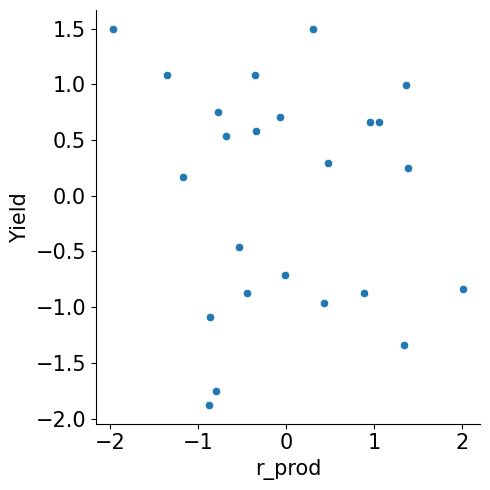

In [20]:
feature_1 = 'r_prod'
feature_2 = 'valid_yield'
sns.relplot(data = all_std_df, x = feature_1, y = feature_2)
plt.xlabel(feature_1, fontsize = 15)
plt.ylabel('Yield', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


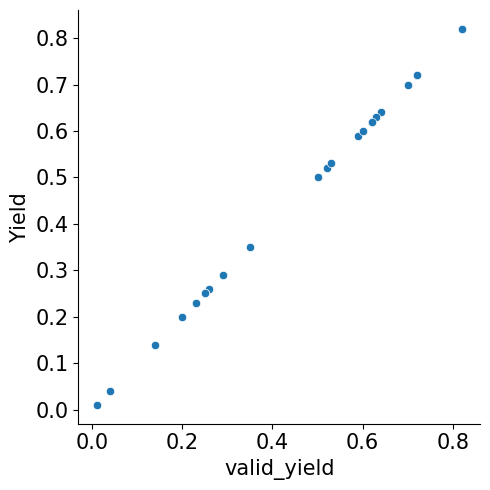

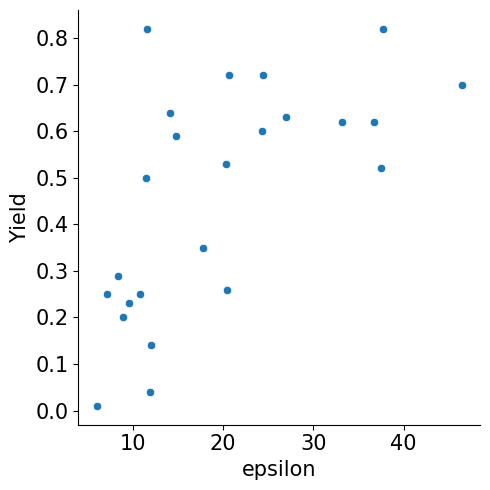

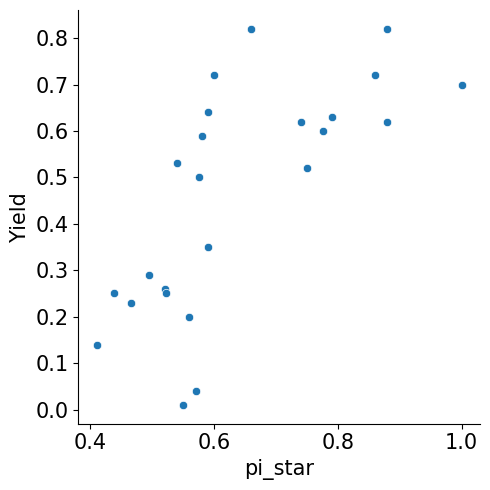

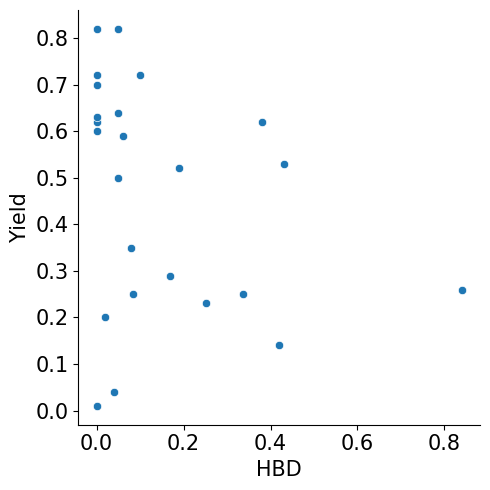

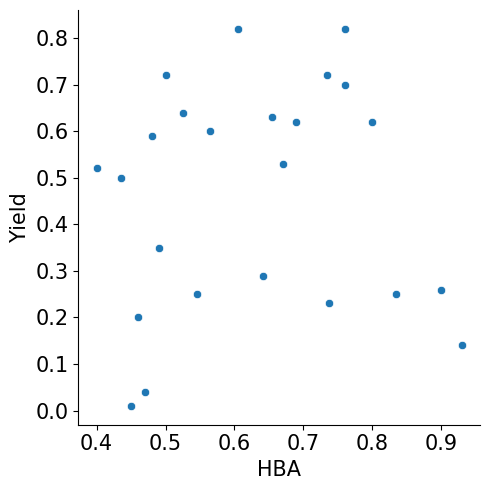

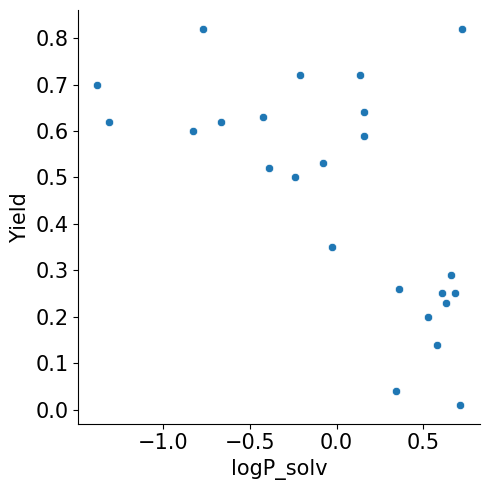

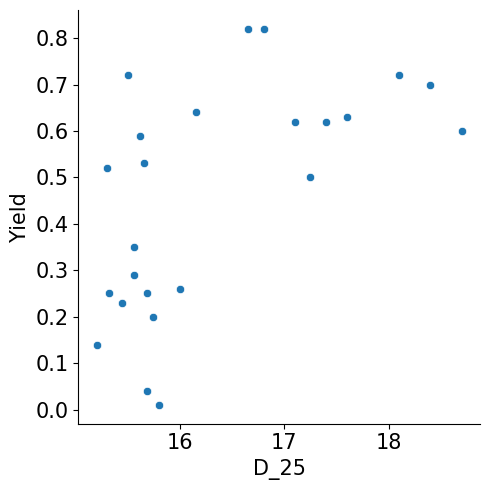

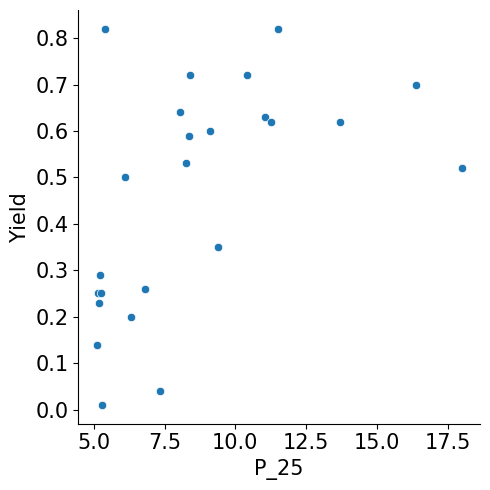

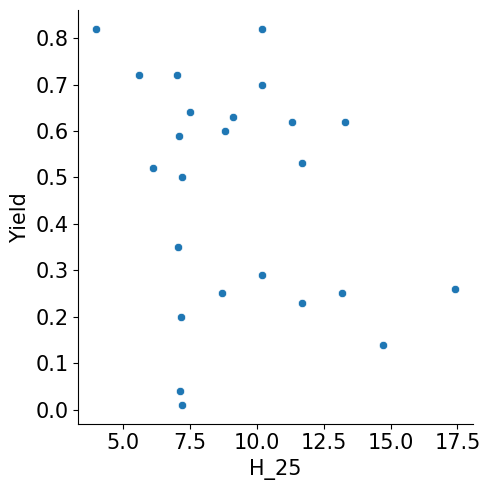

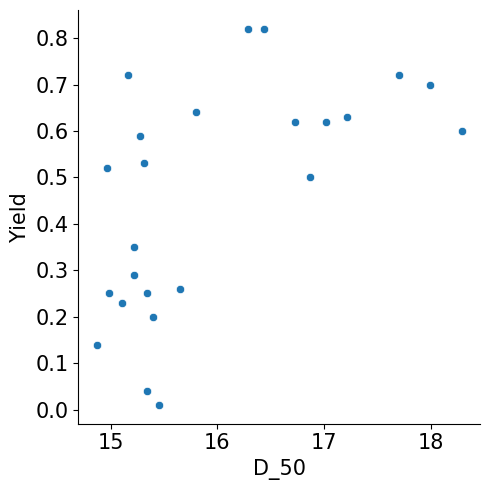

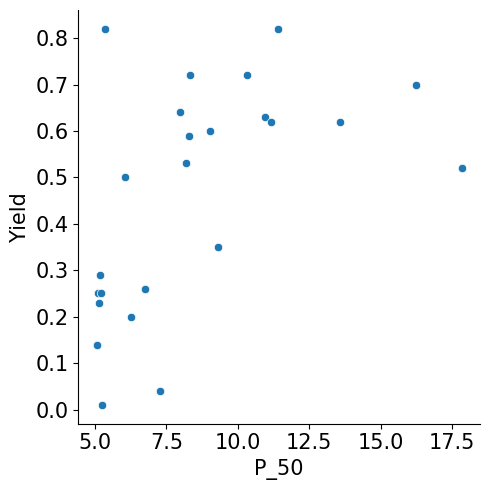

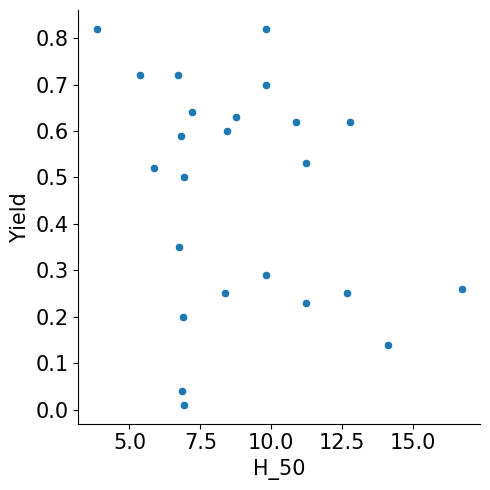

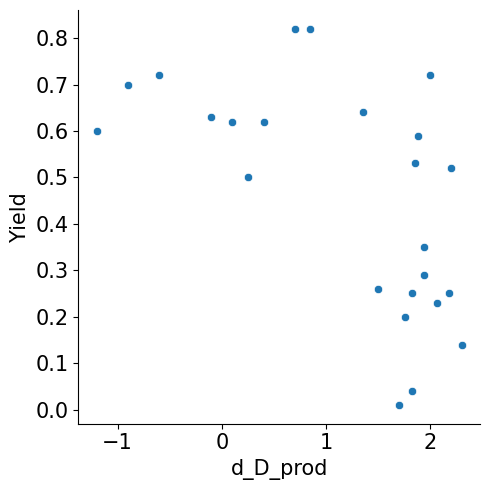

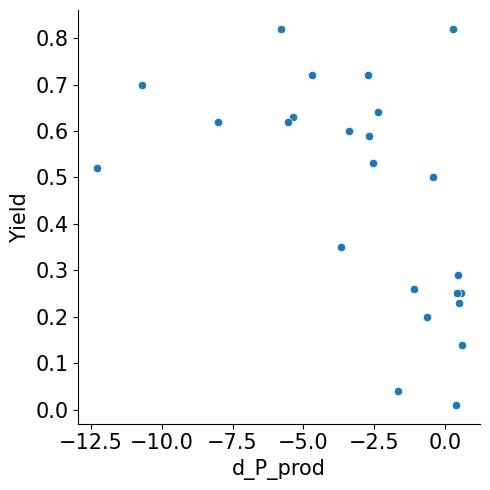

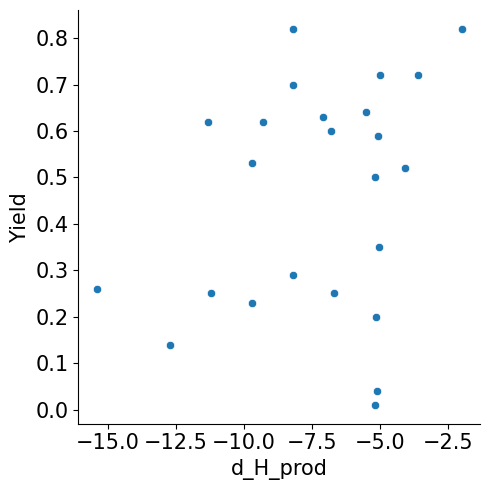

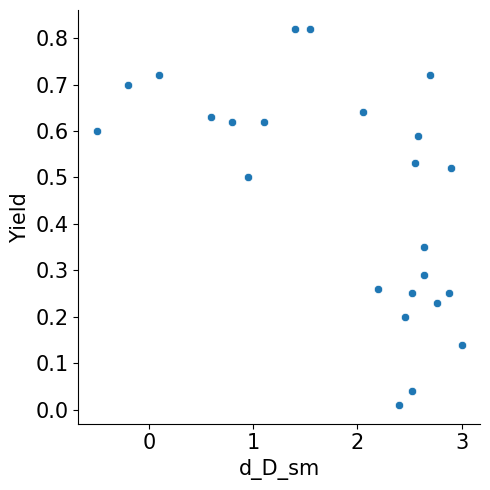

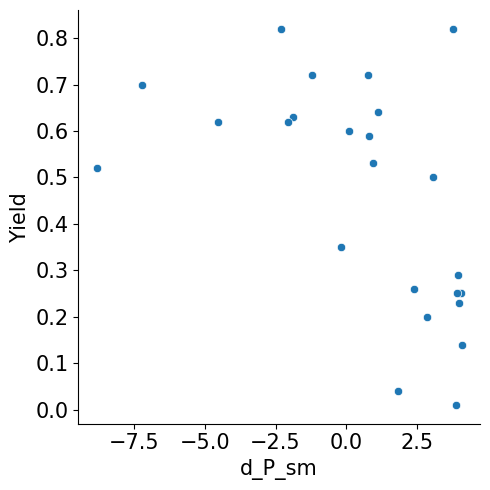

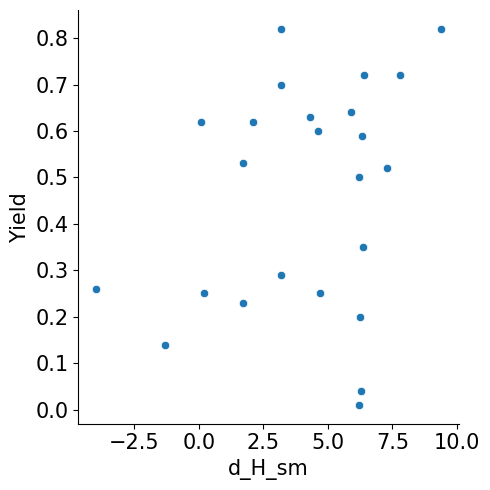

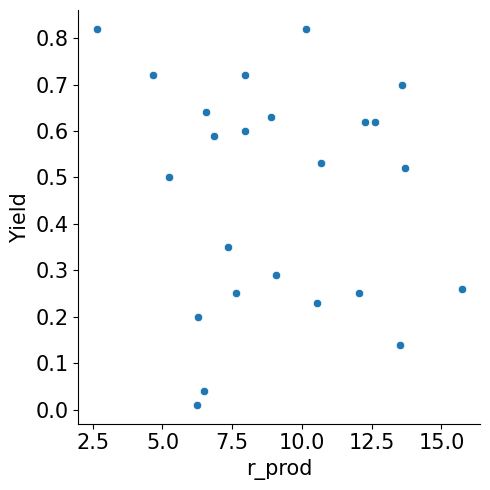

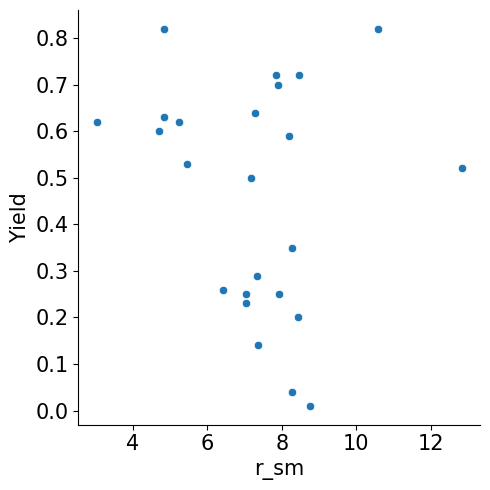

In [21]:
#plot yield versus all the features of interest
all_features_list = all_std_df.columns

result_folder_name = 'yield_vs_feature/'
for feature in all_features_list:
    to_plot = sns.relplot(data = all_non_zero_df, x = feature, y = 'valid_yield')
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('Yield', fontsize = 15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    to_plot_name = '_'.join(['yield_vs', feature])
    plt.tight_layout()
    #plt.savefig(result_folder_name + to_plot_name)
    
    

<Figure size 800x600 with 0 Axes>

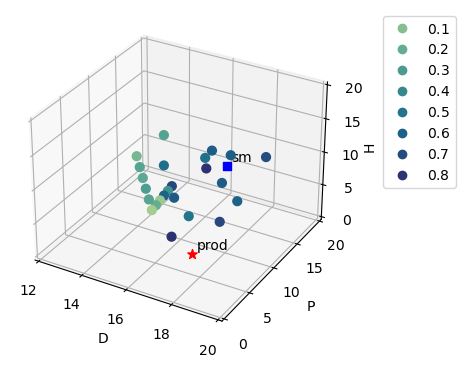

In [22]:
#plot in 3d hsp space

from matplotlib.colors import ListedColormap

to_plot_df = all_non_zero_df


x, y, z, valid_yield = to_plot_df['D_25'], to_plot_df['P_25'], to_plot_df['H_25'], to_plot_df['valid_yield']


fig = plt.figure(figsize = (8, 6))
ax = plt.figure().add_subplot(projection='3d')

cmap = ListedColormap(sns.color_palette("crest", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=valid_yield, marker='o', cmap=cmap, alpha=1)

hsp_prod = ax.scatter(mono_prod_d, mono_prod_p, mono_prod_h, s = 50, c = 'r', marker = '*', label = 'prod') #product
hsp_sm = ax.scatter(mono_sm_d, mono_sm_p, mono_sm_h, s = 30, c = 'b', marker = 's', label = 'sm') #starting material

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1, 1), loc=2)
#plt.legend()

ax.text(mono_prod_d +0.1, mono_prod_p+0.5, mono_prod_h+0.5, r'prod', fontsize=10)
ax.text(mono_sm_d +0.1, mono_sm_p+0.5, mono_sm_h+0.5, r'sm', fontsize=10)


ax.set_xlabel('D')
ax.set_ylabel('P')
ax.set_zlabel('H', rotation = 90)
ax.zaxis.labelpad=-1

ax.set_xlim3d(12, 20)
ax.set_ylim3d(0, 20)
ax.set_zlim3d(0, 20)

    # Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

#plt.savefig(plt_name)
plt.show()



<Axes: >

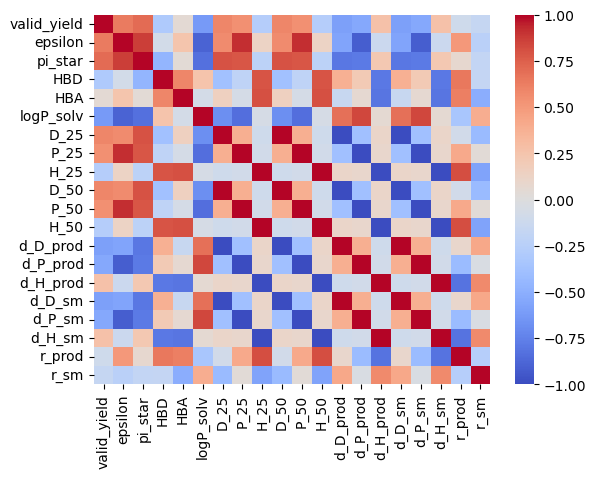

In [23]:
all_std_df_corr = all_std_df.corr()

sns.heatmap(all_std_df_corr, cmap = 'coolwarm')

In [24]:
#reduce feature dimension

all_std_without_yield_df = all_std_df.drop(['valid_yield'], axis = 1)
all_std_without_yield_df

,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50,d_D_prod,d_P_prod,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm
0,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.439018,0.817056,0.284645,-0.439018,-0.817056,-0.284645,-0.439018,-0.817056,-0.284645,0.312723,-1.230452
1,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.806196,0.504443,-0.741680,0.806196,-0.504443,0.741680,0.806196,-0.504443,0.741680,-0.354810,0.581490
2,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.971589,2.209604,0.284645,-1.971589,-2.209604,-0.284645,-1.971589,-2.209604,-0.284645,1.363292,0.303726
3,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,1.013732,1.442282,0.637444,-1.013732,-1.442282,-0.637444,-1.013732,-1.442282,-0.637444,0.958991,-1.034785
4,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,-0.997767,2.664314,-1.030334,0.997767,-2.664314,1.030334,0.997767,-2.664314,1.030334,1.390999,2.770944
5,0.064191,-0.770655,3.454169,1.796841,0.578684,-0.327268,-0.518653,2.593876,-0.327268,-0.518653,2.593876,0.327268,0.518653,-2.593876,0.327268,0.518653,-2.593876,2.009430,-0.448649
6,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,-1.093553,-1.001782,1.727915,1.093553,1.001782,-1.727915,1.093553,1.001782,-1.727915,1.339105,0.035234
7,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.518839,-0.944943,-0.677535,0.518839,0.944943,0.677535,0.518839,0.944943,0.677535,-0.876295,0.724818
8,-0.175693,-0.317963,-0.338970,-0.898420,-0.038224,-0.748725,0.214566,-0.728851,-0.748725,0.214566,-0.728851,0.748725,-0.214566,0.728851,0.748725,-0.214566,0.728851,-0.535372,0.484503
9,-0.437904,-0.382633,-0.438790,-0.964159,0.255846,-0.691253,-0.075311,-0.716022,-0.691253,-0.075311,-0.716022,0.691253,0.075311,0.716022,0.691253,0.075311,0.716022,-0.684567,0.450215


In [25]:
all_std_df_reset_index = all_std_df.reset_index(drop=True)
all_non_zero_df_reset_index = all_non_zero_df.reset_index(drop = True)

In [26]:
all_std_without_yield_reset_index = all_std_without_yield_df.reset_index(drop=True)

In [27]:
all_non_zero_df_reset_index

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50,d_D_prod,d_P_prod,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm
0,0.82,37.780,0.880,0.000,0.760,-0.770,16.80,11.50,10.20,16.432500,11.399375,9.799650,0.70,-5.80,-8.20,1.40,-2.32,3.20,10.141006,4.843800
1,0.72,20.700,0.600,0.100,0.500,-0.210,15.50,10.40,7.00,15.160938,10.309000,6.725250,2.00,-4.70,-5.00,2.70,-1.22,6.40,7.942921,8.462175
2,0.70,46.450,1.000,0.000,0.760,-1.380,18.40,16.40,10.20,17.997500,16.256500,9.799650,-0.90,-10.70,-8.20,-0.20,-7.22,3.20,13.600368,7.907490
3,0.62,36.700,0.880,0.000,0.690,-1.310,17.40,13.70,11.30,17.019375,13.580125,10.856475,0.10,-8.00,-9.30,0.80,-4.52,2.10,12.269067,5.234539
4,0.52,37.500,0.750,0.190,0.400,-0.390,15.30,18.00,6.10,14.965313,17.842500,5.860575,2.20,-12.30,-4.10,2.90,-8.82,7.30,13.691603,12.834422
5,0.26,20.450,0.520,0.840,0.900,0.360,16.00,6.80,17.40,15.650000,6.740500,16.717050,1.50,-1.10,-15.40,2.20,2.38,-4.00,15.728001,6.405029
6,0.14,12.000,0.410,0.420,0.930,0.580,15.20,5.10,14.70,14.867500,5.055375,14.123025,2.30,0.60,-12.70,3.00,4.08,-1.30,13.520725,7.371323
7,0.01,6.020,0.550,0.000,0.450,0.710,15.80,5.30,7.20,15.454375,5.253625,6.917400,1.70,0.40,-5.20,2.40,3.88,6.20,6.225753,8.748394
8,0.35,17.764,0.590,0.080,0.490,-0.026,15.56,9.38,7.04,15.219625,9.297925,6.763680,1.94,-3.68,-5.04,2.64,-0.20,6.36,7.348360,8.268494
9,0.59,14.828,0.580,0.060,0.480,0.158,15.62,8.36,7.08,15.278313,8.286850,6.802110,1.88,-2.66,-5.08,2.58,0.82,6.32,6.857084,8.200024


In [28]:
from sklearn.decomposition import PCA
def do_pca(input_array, n_comp = 8):
    
    pca = PCA(n_components = n_comp)
    pca.fit(input_array)
    
    pca_comp = pca.components_
    #print(f"PCA components: {pca_comp}")

    #explained variance ratio
    exp_var_ratio = pca.explained_variance_ratio_
    #print(f"Explained variance ratio: {exp_var_ratio}")

    #singular values
    sig_val = pca.singular_values_
    #print(f"Singular values: {sig_val}")
    
    #transform
    transformed_data = pca.fit_transform(input_array)
    #print(transformed_data)
    
    #loading_matrix
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    loading_matrix_column = []
    for i in range(0, n_comp):
        loading_matrix_column.append('PC'+str(i+1))
    
    
    loading_matrix = pd.DataFrame(loadings, columns = loading_matrix_column, index = input_array.columns)
    #print(loading_matrix)
    
    #get eigenvalues or explained_variance
    exp_var = pca.explained_variance_
    print(f"explained variance: {exp_var}")
    
    #get_score
    X_pca = pca.transform(input_array)
    scores = X_pca
    #print(f"score: {scores}")
    
    return pca_comp, exp_var_ratio, sig_val, transformed_data, loading_matrix, exp_var, loading_matrix_column, scores

In [29]:
dataset = all_std_without_yield_reset_index
feature_X = dataset.columns

pca_comp, exp_var_ratio, sig_val, transformed_data, loading_matrix, exp_var, loading_matrix_column, scores = do_pca(dataset, 8)

explained variance: [8.81076529 6.69236762 3.16978965 0.56978297 0.3001189  0.1854715
 0.05317203 0.03609041]


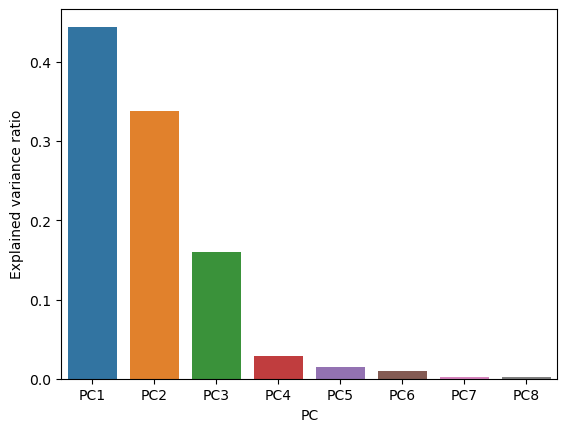

In [30]:
#get scree plot

pc_list = loading_matrix_column
exp_var_ratio = exp_var_ratio

to_plot_dict = dict(map(lambda i, j : (i, j), pc_list, exp_var_ratio))
to_plot_data = pd.DataFrame(to_plot_dict, index = feature_X)

# print(pc_list, exp_var_ratio)

fig, ax = plt.subplots()
ax = sns.barplot(to_plot_data)
plt.xlabel('PC')
plt.ylabel('Explained variance ratio')
#plt.savefig('scree_plot_all.png')
fig.show()

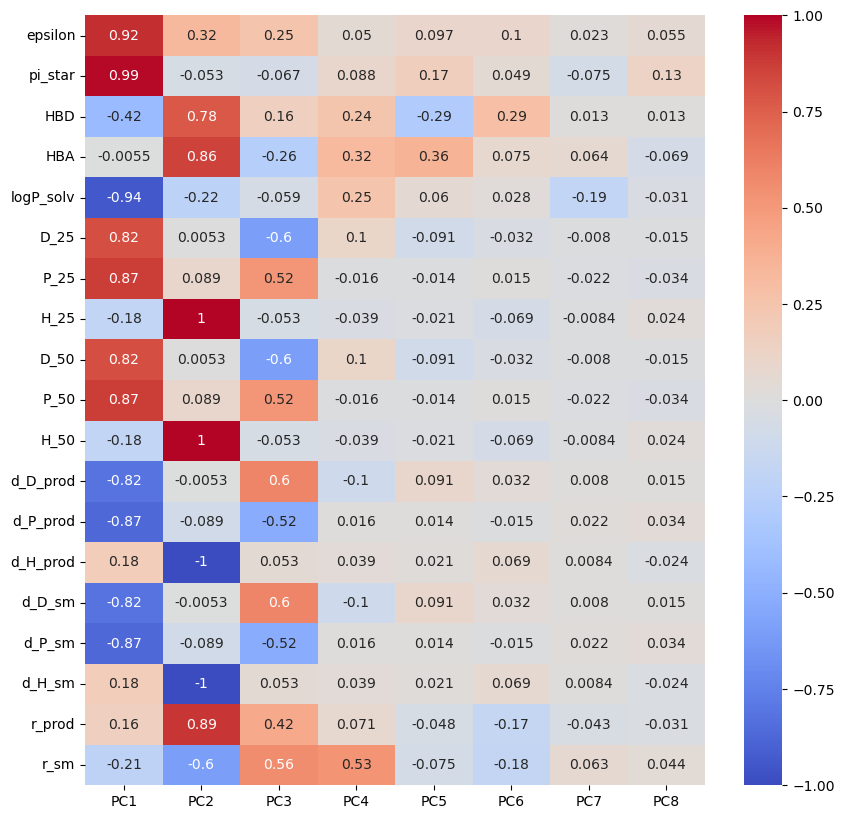

In [31]:
#plot the loading matrix

fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(loading_matrix, annot = True, cmap = 'coolwarm')
#plt.savefig('loading_matrix_heatmap.png')
fig.show()

In [32]:
pca_comp_2, exp_var_ratio_2, sig_val_2, transformed_data_2, loading_matrix_2, exp_var_2, loading_matrix_column_2, score_2 = do_pca(dataset, 2)

explained variance: [8.81076529 6.69236762]


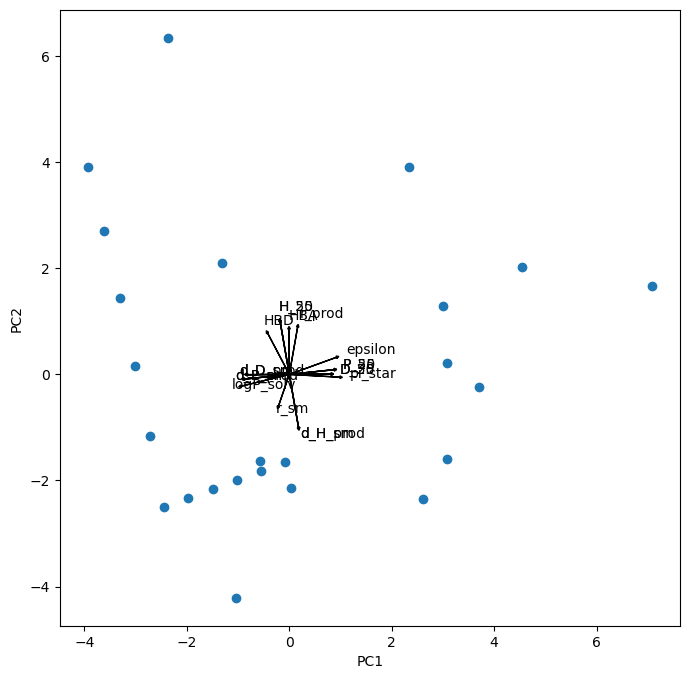

In [33]:
#Biplot - a combination of loadings and scores.
scores = np.array(score_2)
loadings = np.array(loading_matrix_2)


fig, ax = plt.subplots(figsize = (8, 8))

# Plot the scores
ax.scatter(scores[:, 0], scores[:, 1])
#ax = sns.scatterplot(scores, x = 'PC1', y = 'PC2', hue = all_non_zero_df_reset_index['valid_yield'])

# Plot the loadings
for i, v in enumerate(loadings):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05)
    ax.text(v[0] * 1.2, v[1] * 1.2, feature_X[i])
    #ax.text(v[0] * 1.1, v[1] * 1.1, f"Variable {i+1}")

# Set the axis limits
#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 5)

# Set the axis labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Show the plot
#plt.savefig('biplot.png')
plt.show()

In [34]:
all_std_df_reset_index["valid_yield"]

0     1.498429
1     1.081716
2     0.998374
3     0.665004
4     0.248291
5    -0.835161
6    -1.335216
7    -1.876943
8    -0.460120
9     0.539990
10   -1.751929
11   -1.085189
12   -0.876833
13   -0.960175
14   -0.710148
15   -0.876833
16    0.748346
17    0.164949
18    1.498429
19    0.289962
20    0.706675
21    0.581661
22    1.081716
23    0.665004
Name: valid_yield, dtype: float64

A few features are giving redundant information

In [35]:
feature_to_remove = ['D_50', 'P_50', 'H_50', 'd_D_prod', 'd_P_prod', 'd_H_prod', 'd_D_sm', 'd_P_sm', 'd_H_sm']

reduced_dataset = all_std_without_yield_reset_index.drop(feature_to_remove, axis = 1)
reduced_df_reset_index = reduced_dataset.reset_index(drop = True)

reduced_df_reset_index

,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,r_prod,r_sm
0,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.312723,-1.230452
1,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.354810,0.581490
2,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.363292,0.303726
3,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,0.958991,-1.034785
4,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,1.390999,2.770944
5,0.064191,-0.770655,3.454169,1.796841,0.578684,-0.327268,-0.518653,2.593876,2.009430,-0.448649
6,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,1.339105,0.035234
7,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.876295,0.724818
8,-0.175693,-0.317963,-0.338970,-0.898420,-0.038224,-0.748725,0.214566,-0.728851,-0.535372,0.484503
9,-0.437904,-0.382633,-0.438790,-0.964159,0.255846,-0.691253,-0.075311,-0.716022,-0.684567,0.450215


In [36]:
dataset = reduced_df_reset_index
feature_X = dataset.columns

pca_comp_rd, exp_var_ratio_rd, sig_val_rd, transformed_data_rd, loading_matrix_rd, exp_var_rd, loading_matrix_column_rd, scores_rd = do_pca(dataset, 8)

explained variance: [4.55484939 3.59159338 1.35967178 0.48170361 0.23141514 0.13844903
 0.05022066 0.02154687]


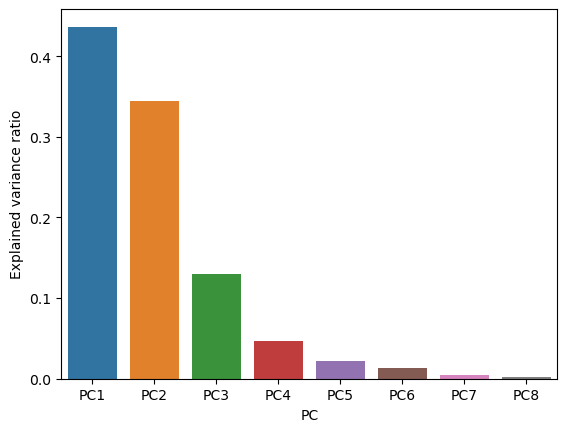

In [37]:
#get scree plot

pc_list = loading_matrix_column_rd
exp_var_ratio = exp_var_ratio_rd

to_plot_dict = dict(map(lambda i, j : (i, j), pc_list, exp_var_ratio_rd))
to_plot_data = pd.DataFrame(to_plot_dict, index = feature_X)

# print(pc_list, exp_var_ratio)

fig, ax = plt.subplots()
ax = sns.barplot(to_plot_data)
plt.xlabel('PC')
plt.ylabel('Explained variance ratio')
#plt.savefig('scree_plot_all.png')
fig.show()

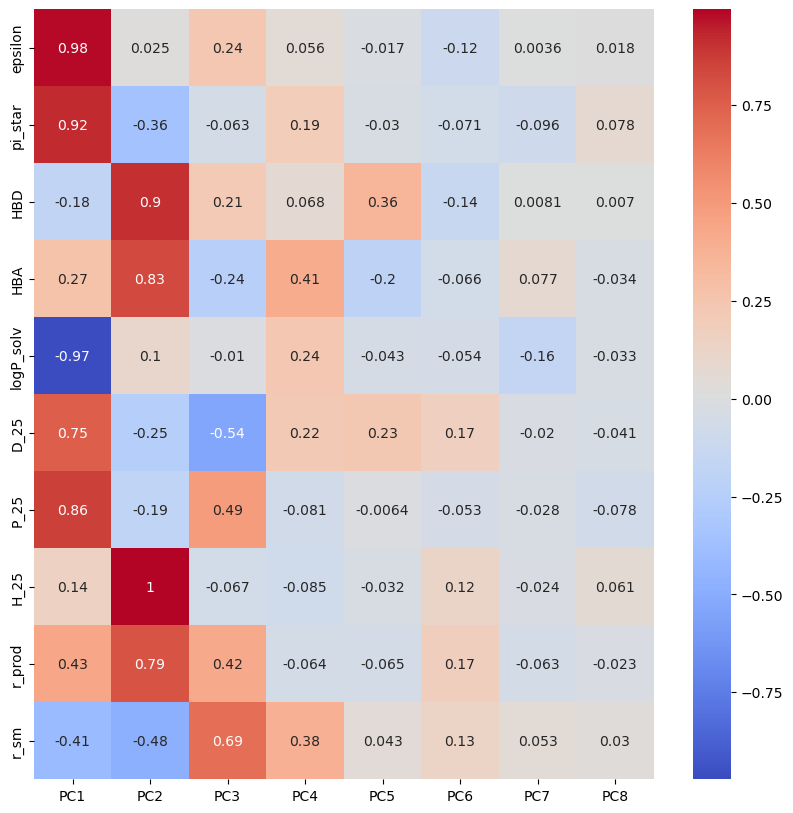

In [38]:
#plot the loading matrix of reduced features

fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(loading_matrix_rd, annot = True, cmap = 'coolwarm')
#plt.savefig('loading_matrix_heatmap.png')
fig.show()

In [39]:
pca_comp_rd_2, exp_var_ratio_rd_2, sig_val_rd_2, transformed_data_rd_2, loading_matrix_rd_2, exp_var_rd_2, loading_matrix_column_rd_2, score_rd_2 = do_pca(dataset, 2)

explained variance: [4.55484939 3.59159338]


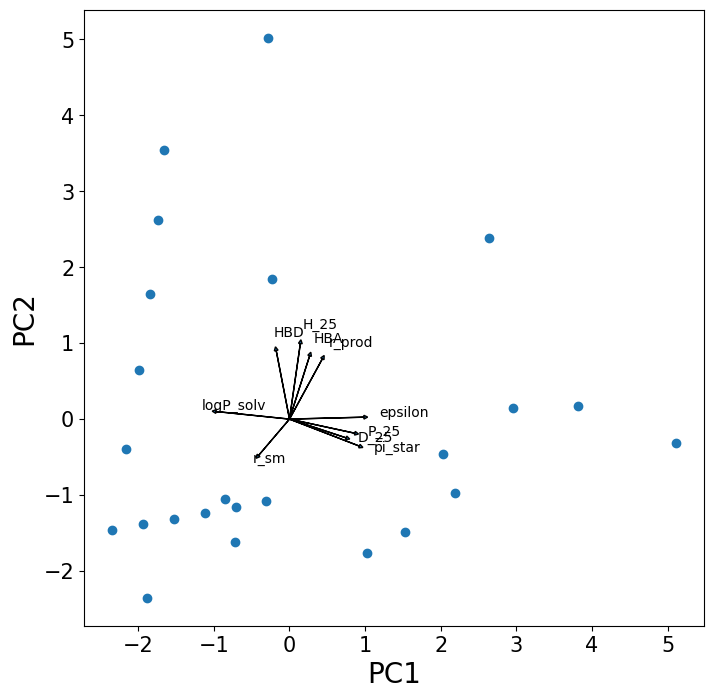

In [40]:
#Biplot - a combination of loadings and scores.
scores = np.array(score_rd_2)
loadings = np.array(loading_matrix_rd_2)


fig, ax = plt.subplots(figsize = (8, 8))

# Plot the scores
ax.scatter(scores[:, 0], scores[:, 1])
#sns.scatterplot(scores, hue = all_non_zero_df_reset_index['valid_yield'])

# Plot the loadings
for i, v in enumerate(loadings):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05)
    ax.text(v[0] * 1.2, v[1] * 1.2, feature_X[i])
    #ax.text(v[0] * 1.1, v[1] * 1.1, f"Variable {i+1}")

# Set the axis limits
#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 5)

# Set the axis labels
ax.set_xlabel("PC1", fontsize = 20)
ax.set_ylabel("PC2", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Show the plot
#plt.savefig('biplot.png')
plt.show()

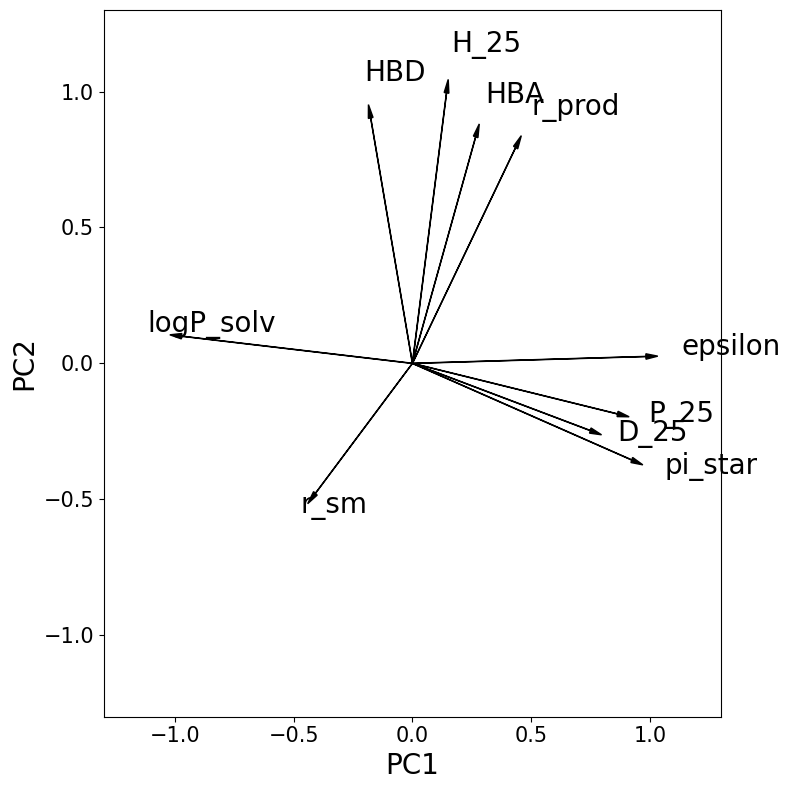

In [41]:
#only the arrow (loading part)
# Plot the loadings
fig, ax = plt.subplots(figsize = (8, 8))

for i, v in enumerate(loadings):
    ax.arrow(0, 0, v[0], v[1], head_width=0.02, head_length=0.05, facecolor = 'black')
    ax.text(v[0] * 1.15, v[1] * 1.15, feature_X[i], fontsize = 20)

ax.set_xlabel("PC1", fontsize = 20)
ax.set_ylabel("PC2", fontsize = 20)
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [41]:
pca_df = pd.DataFrame(transformed_data_2, columns = ['PC1', 'PC2'])
#Include the yield information.
pca_df['standardised_yield'] = all_std_df_reset_index["valid_yield"]
pca_df['yield'] = all_non_zero_df_reset_index['valid_yield']
#pca_df.drop(['yield'], axis = 1)

pca_df

,PC1,PC2,standardised_yield,yield
0,2.993404,1.292484,1.498429,0.82
1,-0.088412,-1.644992,1.081716,0.72
2,7.073370,1.667592,0.998374,0.70
3,4.542111,2.017177,0.665004,0.62
4,3.072163,-1.591613,0.248291,0.52
5,-2.375972,6.346179,-0.835161,0.26
6,-3.931283,3.913299,-1.335216,0.14
7,-2.444359,-2.499060,-1.876943,0.01
8,-0.554738,-1.812950,-0.460120,0.35
9,-1.023858,-1.984646,0.539990,0.59


In [646]:
pca_df.to_csv('pca_df_mono_24.csv')

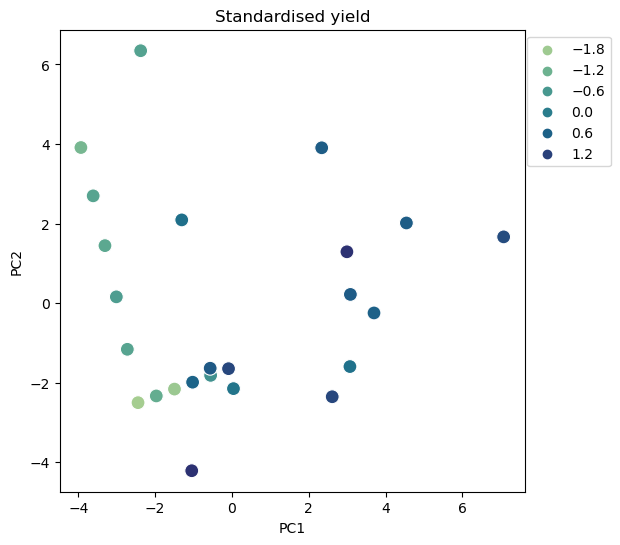

In [42]:
fig, ax = plt.subplots(figsize = (6, 6))
ax = sns.scatterplot(pca_df, x = 'PC1', y = 'PC2', hue = pca_df['standardised_yield'], s = 100, palette='crest')
ax.legend(bbox_to_anchor = (1.2, 1))
plt.title('Standardised yield')
#plt.savefig('biplot_with_std_yield.png')
plt.show()

In [648]:
loading_matrix_rd_2.to_csv('first_2_PC_loadings.csv')

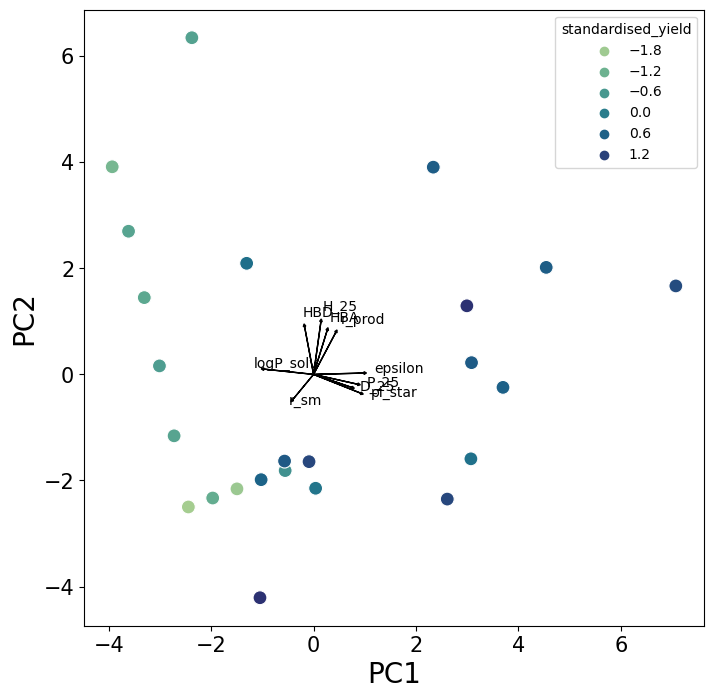

In [43]:
#Biplot - a combination of loadings and scores.
scores = np.array(score_rd_2)
loadings = np.array(loading_matrix_rd_2)


fig, ax = plt.subplots(figsize = (8, 8))

# Plot the scores
#ax.scatter(scores[:, 0], scores[:, 1])
ax = sns.scatterplot(pca_df, x = 'PC1', y = 'PC2', hue = pca_df['standardised_yield'], s = 100, palette='crest')

# Plot the loadings
for i, v in enumerate(loadings):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05)
    ax.text(v[0] * 1.2, v[1] * 1.2, feature_X[i])
    #ax.text(v[0] * 1.1, v[1] * 1.1, f"Variable {i+1}")

# Set the axis limits
#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 5)

# Set the axis labels
ax.set_xlabel("PC1", fontsize = 20)
ax.set_ylabel("PC2", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Show the plot
#plt.savefig('biplot.png')
plt.show()

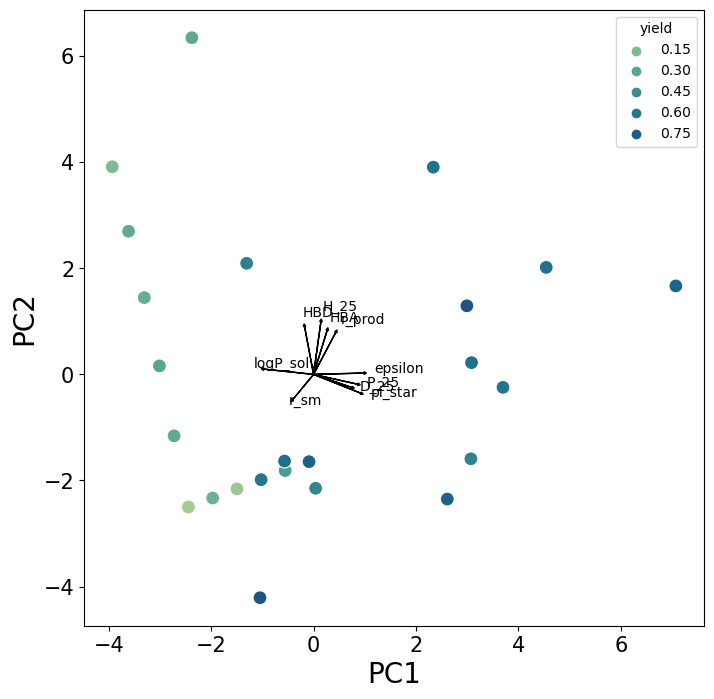

In [649]:
#Biplot - a combination of loadings and scores. Color is yield.

#include new validation points

scores = np.array(score_rd_2)
loadings = np.array(loading_matrix_rd_2)


fig, ax = plt.subplots(figsize = (8, 8))

# Plot the scores
#ax.scatter(scores[:, 0], scores[:, 1])
ax = sns.scatterplot(pca_df, x = 'PC1', y = 'PC2', hue = pca_df['yield'], hue_norm = (0,1), s = 100, palette='crest')

# Plot the loadings
for i, v in enumerate(loadings):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05)
    ax.text(v[0] * 1.2, v[1] * 1.2, feature_X[i])
    #ax.text(v[0] * 1.1, v[1] * 1.1, f"Variable {i+1}")

# Set the axis limits
#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 5)

# Set the axis labels
ax.set_xlabel("PC1", fontsize = 20)
ax.set_ylabel("PC2", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Show the plot
#plt.savefig('biplot.png')
plt.show()

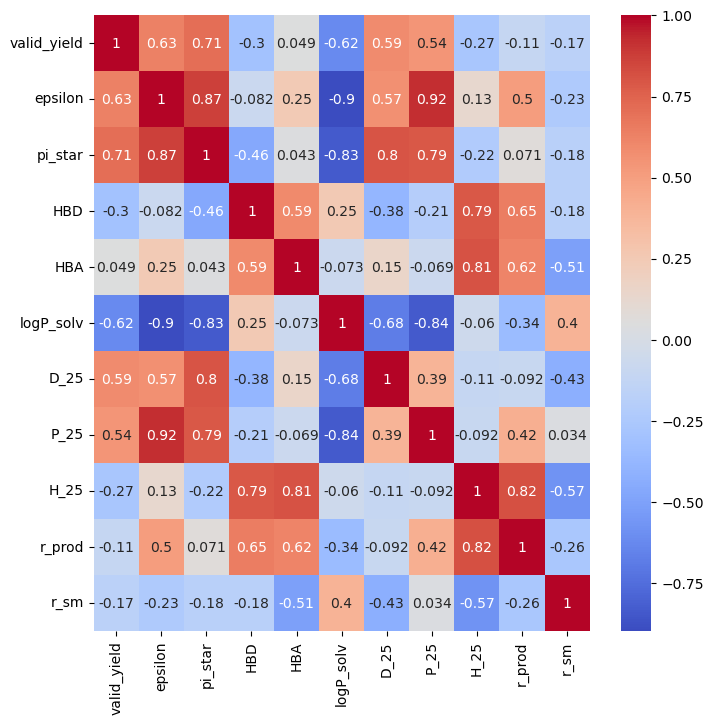

In [46]:
key_corr_with_yield_df = all_std_df.drop(feature_to_remove, axis = 1)
key_corr_with_yield_corr = key_corr_with_yield_df.corr()

fig, ax = plt.subplots(figsize = (8, 8))
ax = sns.heatmap(key_corr_with_yield_corr, cmap = 'coolwarm', annot = True)

In [48]:
# organise pca results

def adv_pca(input_array, pc_to_inverse, n_comp = 8):
    
    pca = PCA(n_components = n_comp)
    pca.fit(input_array)
    
    pca_comp = pca.components_
    #print(f"PCA components: {pca_comp}")

    #explained variance ratio
    exp_var_ratio = pca.explained_variance_ratio_
    #print(f"Explained variance ratio: {exp_var_ratio}")

    #singular values
    sig_val = pca.singular_values_
    #print(f"Singular values: {sig_val}")
    
    #transform
    transformed_data = pca.fit_transform(input_array)
    #print(transformed_data)
    
    #loading_matrix
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    loading_matrix_column = []
    for i in range(0, n_comp):
        loading_matrix_column.append('PC'+str(i+1))
    
    
    loading_matrix = pd.DataFrame(loadings, columns = loading_matrix_column, index = input_array.columns)
    #print(loading_matrix)
    
    #get eigenvalues or explained_variance
    exp_var = pca.explained_variance_
    print(f"explained variance: {exp_var}")
    
    #get_score
    X_pca = pca.transform(input_array)
    scores = X_pca
    #print(f"score: {scores}")
    
    #inverse data back to original space test
    x_pc = pc_to_inverse #an n_comp dimensional array in the PCs space
    inverse_x = pca.inverse_transform(x_pc)
    print(f"{x_pc} in the original space is: \n {inverse_x}")
    
    pca_out_dict = {
        'pca_comp' : pca_comp,
        'exp_var_ratio' : exp_var_ratio,
        'sig_val' : sig_val,
        'transformed_data' : transformed_data,
        'loading_matrix' : loading_matrix,
        'exp_var' : exp_var,
        'loading_matrix_column' : loading_matrix_column,
        'scores' : scores,
        'inverse_x' : inverse_x
    }
    
    return pca_out_dict

In [615]:
dataset = reduced_df_reset_index
feature_X = dataset.columns
pc_to_inverse = np.array([-2.5, -2.5])

adv_pca_dict = adv_pca(dataset, pc_to_inverse, n_comp = 2)
print(feature_X)

explained variance: [4.55484939 3.59159338]
[-2.5 -2.5] in the original space is: 
 [-1.18572364 -0.61367304 -0.98510086 -1.41128727  1.0073119  -0.55167277
 -0.76687162 -1.48094054 -1.55657954  1.1099876 ]
Index(['epsilon', 'pi_star', 'HBD', 'HBA', 'logP_solv', 'D_25', 'P_25', 'H_25',
       'r_prod', 'r_sm'],
      dtype='object')


In [616]:
#try if mix_ext_df can be standardised
non_zero_df_with_text = all_with_dist_df[all_with_dist_df['valid_yield'] != 0]
non_zero_df_with_text_reset = non_zero_df_with_text.reset_index(drop = True)

std_non_zero_df_with_text = stats.zscore(non_zero_df_with_text.drop(to_drop_list, axis = 1))
std_non_zero_df_with_text_reset = std_non_zero_df_with_text.reset_index(drop = True)

In [617]:
std_non_zero_df_with_text_reset.head()

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,P_50,H_50,d_D_prod,d_P_prod,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm
0,1.498429,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.439018,0.817056,0.284645,-0.439018,-0.817056,-0.284645,-0.439018,-0.817056,-0.284645,0.312723,-1.230452
1,1.081716,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.806196,0.504443,-0.741680,0.806196,-0.504443,0.741680,0.806196,-0.504443,0.741680,-0.354810,0.581490
2,0.998374,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.971589,2.209604,0.284645,-1.971589,-2.209604,-0.284645,-1.971589,-2.209604,-0.284645,1.363292,0.303726
3,0.665004,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,1.013732,1.442282,0.637444,-1.013732,-1.442282,-0.637444,-1.013732,-1.442282,-0.637444,0.958991,-1.034785
4,0.248291,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,-0.997767,2.664314,-1.030334,0.997767,-2.664314,1.030334,0.997767,-2.664314,1.030334,1.390999,2.770944


In [618]:
text_list = ['solv_1', 'percent_1', 'solv_2', 'percent_2']
std_non_zero_df_with_text_reset[text_list] = non_zero_df_with_text_reset[text_list]
#std_non_zero_df_with_text_reset[to_drop_list] = non_zero_df_with_text_reset[to_drop_list]

In [619]:
std_non_zero_df_with_text_reset

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,...,d_H_prod,d_D_sm,d_P_sm,d_H_sm,r_prod,r_sm,solv_1,percent_1,solv_2,percent_2
0,1.498429,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.439018,...,-0.284645,-0.439018,-0.817056,-0.284645,0.312723,-1.230452,DMAC,1.0,NaN,NaN
1,1.081716,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.806196,...,0.741680,0.806196,-0.504443,0.741680,-0.354810,0.581490,Acetone,1.0,NaN,NaN
2,0.998374,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.971589,...,-0.284645,-1.971589,-2.209604,-0.284645,1.363292,0.303726,DMSO,1.0,NaN,NaN
3,0.665004,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,1.013732,...,-0.637444,-1.013732,-1.442282,-0.637444,0.958991,-1.034785,DMF,1.0,NaN,NaN
4,0.248291,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,-0.997767,...,1.030334,0.997767,-2.664314,1.030334,1.390999,2.770944,ACN,1.0,NaN,NaN
5,-0.835161,0.064191,-0.770655,3.454169,1.796841,0.578684,-0.327268,-0.518653,2.593876,-0.327268,...,-2.593876,0.327268,0.518653,-2.593876,2.009430,-0.448649,NPA,1.0,NaN,NaN
6,-1.335216,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,-1.093553,...,-1.727915,1.093553,1.001782,-1.727915,1.339105,0.035234,tBuOH,1.0,NaN,NaN
7,-1.876943,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.518839,...,0.677535,0.518839,0.944943,0.677535,-0.876295,0.724818,EA,1.0,NaN,NaN
8,-0.460120,-0.175693,-0.317963,-0.338970,-0.898420,-0.038224,-0.748725,0.214566,-0.728851,-0.748725,...,0.728851,0.748725,-0.214566,0.728851,-0.535372,0.484503,EA,0.2,acetone,0.8
9,0.539990,-0.437904,-0.382633,-0.438790,-0.964159,0.255846,-0.691253,-0.075311,-0.716022,-0.691253,...,0.716022,0.691253,0.075311,0.716022,-0.684567,0.450215,EA,0.4,acetone,0.6


In [620]:
def calc_delta_feature(feature_list, input_df, inversed_pca):
    
    out_df = input_df
    
    for i, feature in enumerate(feature_list):
        
        orig_feature_value = input_df[feature]
        inverse_feature_value = inversed_pca[i]
        diff_feature_value = abs(inverse_feature_value - orig_feature_value)
        updated_feature_name = '_'.join(['diff', str(feature)])
        out_df[updated_feature_name] = diff_feature_value
    
    return out_df


        
        

In [621]:
inv_pca = adv_pca_dict['inverse_x']
print(feature_X)
df_with_inv_pca_diff = calc_delta_feature(feature_X, std_non_zero_df_with_text_reset, inv_pca)

Index(['epsilon', 'pi_star', 'HBD', 'HBA', 'logP_solv', 'D_25', 'P_25', 'H_25',
       'r_prod', 'r_sm'],
      dtype='object')


In [622]:
df_with_inv_pca_diff

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,...,diff_epsilon,diff_pi_star,diff_HBD,diff_HBA,diff_logP_solv,diff_D_25,diff_P_25,diff_H_25,diff_r_prod,diff_r_sm
0,1.498429,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.439018,...,2.797639,2.171150,0.246853,2.287795,2.234601,0.990690,1.583928,1.765585,1.869303,2.340440
1,1.081716,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.806196,...,1.272242,0.360381,0.745950,0.578605,1.339606,0.254523,1.271315,0.739260,1.201769,0.528497
2,0.998374,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.971589,...,3.571947,2.947195,0.246853,2.287795,3.209507,2.523261,2.976476,1.765585,2.919872,0.806262
3,0.665004,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,1.013732,...,2.701185,2.171150,0.246853,1.827628,3.097633,1.565405,2.209153,2.118385,2.515571,2.144773
4,0.248291,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,-0.997767,...,2.772632,1.330436,1.195138,0.078776,1.627283,0.446095,3.431185,0.450606,2.947579,1.660956
5,-0.835161,0.064191,-0.770655,3.454169,1.796841,0.578684,-0.327268,-0.518653,2.593876,-0.327268,...,1.249914,0.156982,4.439270,3.208128,0.428628,0.224405,0.248219,4.074817,3.566010,1.558637
6,-1.335216,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,-1.093553,...,0.495254,0.868356,2.343061,3.405342,0.077023,0.541880,0.234910,3.208855,2.895685,1.074754
7,-1.876943,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.518839,...,0.038814,0.037029,0.246853,0.249915,0.130744,0.032834,0.178072,0.803406,0.680285,0.385170
8,-0.460120,-0.175693,-0.317963,-0.338970,-0.898420,-0.038224,-0.748725,0.214566,-0.728851,-0.748725,...,1.010031,0.295711,0.646131,0.512867,1.045536,0.197052,0.981438,0.752089,1.021208,0.625485
9,0.539990,-0.437904,-0.382633,-0.438790,-0.964159,0.255846,-0.691253,-0.075311,-0.716022,-0.691253,...,0.747819,0.231040,0.546311,0.447129,0.751466,0.139581,0.691560,0.764918,0.872013,0.659772


In [623]:
df_with_inv_pca_diff['solv_1']

0        DMAC
1     Acetone
2        DMSO
3         DMF
4         ACN
5         NPA
6       tBuOH
7          EA
8          EA
9          EA
10         EA
11         EA
12         EA
13         EA
14         EA
15         EA
16    acetone
17    acetone
18    acetone
19    acetone
20       DMSO
21       DMSO
22       DMSO
23       DMSO
Name: solv_1, dtype: object

In [624]:
#from pca loadings rank features
loading = adv_pca_dict['loading_matrix'] #loading is a dataframe
#loading_col = adv_pca_dict['loading_matrix_column']

loading_desc_df = loading.sort_values('PC1', ascending = False)

loading_desc_df

,PC1,PC2
epsilon,0.983794,0.025253
pi_star,0.924214,-0.355489
P_25,0.864230,-0.186090
D_25,0.749329,-0.247193
r_prod,0.434760,0.793919
HBA,0.266419,0.833264
H_25,0.143636,0.995095
HBD,-0.175824,0.902895
r_sm,-0.408919,-0.478322
logP_solv,-0.972463,0.099931


In [625]:
loading_desc_df.iloc[0, 0] #find the most important pc1

0.9837942569191097

In [626]:
loading_desc_df.loc['epsilon', 'PC1']

0.9837942569191097

In [627]:
loading_desc_df.index[0]

'epsilon'

In [628]:
#copy the inclusive dataframe and only select single solvents out;


def find_close_cand_by_feature(pca_loading, all_with_diff, by_pc = 'PC1', importance = 0, find_first = 2):
    loading_desc_df = pca_loading.sort_values(by_pc, ascending = False)
    feature_name = loading_desc_df.index[importance]
    feature_value = loading_desc_df.loc[feature_name, by_pc]
    
    diff_feature_name = '_'.join(['diff', str(feature_name)])
    
    single_solv_df = all_with_diff[all_with_diff['percent_1'] == 1]
    single_solv_df = single_solv_df.reset_index(drop = True)

    sort_feature_single_solv_df = single_solv_df.sort_values(diff_feature_name)
    sort_feature_single_solv_df = sort_feature_single_solv_df.reset_index(drop = True)
    
    #find first x solvents
    first_x_df = sort_feature_single_solv_df.iloc[:find_first, :]
    
    best_solvs = []
    for solv in first_x_df['solv_1']:
        best_solvs.append(solv)
        
    print(f"first {find_first} best solvent candidates are: {best_solvs}")
    
    return sort_feature_single_solv_df, first_x_df

In [629]:
sort_feature_single_solv_df, first_2 = find_close_cand_by_feature(loading, df_with_inv_pca_diff)

first 2 best solvent candidates are: ['EA', 'tBuOH']


In [630]:
sort_feature_single_solv_df

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,...,diff_epsilon,diff_pi_star,diff_HBD,diff_HBA,diff_logP_solv,diff_D_25,diff_P_25,diff_H_25,diff_r_prod,diff_r_sm
0,-1.876943,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.518839,...,0.038814,0.037029,0.246853,0.249915,0.130744,0.032834,0.178072,0.803406,0.680285,0.385170
1,-1.335216,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,-1.093553,...,0.495254,0.868356,2.343061,3.405342,0.077023,0.541880,0.234910,3.208855,2.895685,1.074754
2,-0.835161,0.064191,-0.770655,3.454169,1.796841,0.578684,-0.327268,-0.518653,2.593876,-0.327268,...,1.249914,0.156982,4.439270,3.208128,0.428628,0.224405,0.248219,4.074817,3.566010,1.558637
3,1.081716,0.086518,-0.253292,-0.239151,-0.832682,-0.332294,-0.806196,0.504443,-0.741680,-0.806196,...,1.272242,0.360381,0.745950,0.578605,1.339606,0.254523,1.271315,0.739260,1.201769,0.528497
4,0.665004,1.515461,1.557477,-0.738248,0.416341,-2.090321,1.013732,1.442282,0.637444,1.013732,...,2.701185,2.171150,0.246853,1.827628,3.097633,1.565405,2.209153,2.118385,2.515571,2.144773
5,0.248291,1.586909,0.716763,0.210037,-1.490063,-0.619971,-0.997767,2.664314,-1.030334,-0.997767,...,2.772632,1.330436,1.195138,0.078776,1.627283,0.446095,3.431185,0.450606,2.947579,1.660956
6,1.498429,1.611915,1.557477,-0.738248,0.876508,-1.227289,0.439018,0.817056,0.284645,0.439018,...,2.797639,2.171150,0.246853,2.287795,2.234601,0.990690,1.583928,1.765585,1.869303,2.340440
7,0.998374,2.386224,2.333522,-0.738248,0.876508,-2.202195,1.971589,2.209604,0.284645,1.971589,...,3.571947,2.947195,0.246853,2.287795,3.209507,2.523261,2.976476,1.765585,2.919872,0.806262


In [631]:
first_2['solv_1']

0       EA
1    tBuOH
Name: solv_1, dtype: object

In [632]:
first_2['solv_1']

0       EA
1    tBuOH
Name: solv_1, dtype: object

In [633]:
feature_mat = np.array(first_2['epsilon'])

In [634]:
print(feature_mat)

[-1.22453751 -0.69046992]


In [635]:
reshaped_feature_mat = feature_mat.reshape(1, 2)

In [636]:
feature_mat_pinv = np.linalg.pinv(reshaped_feature_mat)
feature_mat_pinv

array([[-0.6196297 ],
       [-0.34938551]])

In [637]:
target_value = inv_pca[0]
target_value

-1.1857236436003795

In [638]:
coeff_solv = np.dot(feature_mat_pinv, target_value)

In [639]:
coeff_solv

array([[0.73470959],
       [0.41427466]])

In [640]:
#coeff_solv_reshape = coeff_solv.reshape(2, 1)

In [641]:
np.dot(reshaped_feature_mat, coeff_solv)

array([[-1.18572364]])

In [642]:

def calc_binary(feature_name, reduced_data_mat, target_value):

    feature_mat = np.array(reduced_data_mat[feature_name])
    #print(feature_mat)
    reshaped_feature_mat = feature_mat.reshape(1, 2)
    #print(reshaped_feature_mat)
    feature_mat_pinv = np.linalg.pinv(reshaped_feature_mat)
    #print(feature_mat_pinv)
    coeff_solv = np.dot(feature_mat_pinv, target_value)
    #print(coeff_solv)
    
    return coeff_solv

In [643]:
target_value = inv_pca[0]
#print(target_value)
coeff_first_2 = calc_binary('epsilon', first_2, target_value)

#print(coeff_first_2)

In [644]:
first_2

,valid_yield,epsilon,pi_star,HBD,HBA,logP_solv,D_25,P_25,H_25,D_50,...,diff_epsilon,diff_pi_star,diff_HBD,diff_HBA,diff_logP_solv,diff_D_25,diff_P_25,diff_H_25,diff_r_prod,diff_r_sm
0,-1.876943,-1.224538,-0.576644,-0.738248,-1.161373,1.138056,-0.518839,-0.944943,-0.677535,-0.518839,...,0.038814,0.037029,0.246853,0.249915,0.130744,0.032834,0.178072,0.803406,0.680285,0.385170
1,-1.335216,-0.690470,-1.482029,1.357961,1.994055,0.930289,-1.093553,-1.001782,1.727915,-1.093553,...,0.495254,0.868356,2.343061,3.405342,0.077023,0.541880,0.234910,3.208855,2.895685,1.074754


In [645]:
solvs = list(first_2['solv_1'])
coeffs_before_norm = list(coeff_first_2)

coeffs_norm = []
total_coeffs = sum(coeffs_before_norm)
for coeff_before_norm in coeffs_before_norm:
    new_coeff = coeff_before_norm/total_coeffs
    coeffs_norm.append(new_coeff)

coeff_0 = round(coeffs_norm[0][0], 2)
coeff_1 = round(coeffs_norm[1][0], 2)
print(f"Recommended mixture components for {str(pc_to_inverse)} in the 2D PC space is: \n {coeff_0}{solvs[0]} + {coeff_1}{solvs[1]}")

Recommended mixture components for [-2.5 -2.5] in the 2D PC space is: 
 0.64EA + 0.36tBuOH


In [490]:
pca_comp = adv_pca_dict['pca_comp']
print(pca_comp[0])
#print(sum(pca_comp[0]))

[ 0.46096428  0.4330475  -0.08238384  0.12483264 -0.45565481  0.35110359
  0.40494166  0.06730162  0.20371019 -0.19160212]


#TD: reorganise the code and plot yield of validation dataset on the plot.
#save transform information from the pca training data